<a href="https://colab.research.google.com/github/Wanita-8943/efficientnet_keras_transfer_learning/blob/master/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv (r'/content/drive/My Drive/cut_panoramic/All_file_complete1.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
0,1.0,1,7,Y7F,V1.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
1,2.0,1,7,Y7F,Flip_V1.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
2,3.0,2,7,Y7F,V2.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
3,4.0,2,7,Y7F,Flip_V2.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
4,5.0,3,7,Y7F,V3.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศหญิง,Both
...,...,...,...,...,...,...,...,...
5472,215.0,50,25,Y25M,J146.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
5473,216.0,51,25,Y25M,J166.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
5474,217.0,52,25,Y25M,J169.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
5475,218.0,53,25,Y25M,J183.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt


In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras import callbacks

In [5]:
# # Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# # Higher the number, the more complex the model is.
# from efficientnet import EfficientNetB0 as Net
# from efficientnet import center_crop_and_resize, preprocess_input

In [12]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Flimpano1.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [19]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Flimpano1.h5')
height = width = model.input_shape[1]

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 5, 5, 1280)       4049564   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 36)                46116     
                                                                 
Total params: 4,095,680
Trainable params: 46,116
Non-trainable params: 4,049,564
_________________________________________________________________


In [15]:
from tensorflow.keras.preprocessing import image
import pandas as pd

In [ ]:
test = df[df['Fig_Person_Sex'].between(37,40)]
classes =['Y7F','Y7M','Y8F','Y8M','Y9F','Y9M','Y10F','Y10M','Y11F','Y11M','Y12F','Y12M','Y13F','Y13M','Y15F','Y15M','Y16F','Y16M','Y17F','Y17M','Y18F','Y18M','Y19F','Y19M','Y20F','Y20M','Y21F','Y21M','Y22F','Y22M','Y23F','Y23M','Y24F','Y24M','Y25F','Y25M']
results = list()

for i in classes:
    img_path = test[test['Class']==i]['Path_filename'].tolist()
    for j in img_path:
        img = image.load_img(j, target_size=(height, width))
            # Convert it to a Numpy array with target shape.
        x = image.img_to_array(img)
            # Reshape
        x = x.reshape((1,) + x.shape)
        x /= 255.
        result = model.predict([x])[0]
        n = 36
        avgDists = result
        idxs = avgDists.argsort()[::-1][:n] #sort max
        predlist,problist = list(), list()
        for m in idxs:
            pred =  classes[m]
            prob = result[m]
            predlist.append(pred)
            problist.append(prob)
        act_true = i
        prob_max = problist[0]
        pred_max = predlist[0]

        results.append({'classtrue':act_true,'classpre':pred_max,'class_prob':prob_max})

In [22]:
resultss = pd.DataFrame(results)
resultss

,classtrue,classpre,class_prob
0,Y7F,Y23F,0.470490
1,Y7F,Y23F,0.508995
2,Y7F,Y24M,0.257056
3,Y7F,Y24F,0.197814
4,Y7F,Y23F,0.263745
...,...,...,...
260,Y25F,Y9M,0.477103
261,Y25M,Y9M,0.655368
262,Y25M,Y8F,0.107374
263,Y25M,Y9M,0.178103


In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

train = df
#เช็คคลาสใน Predicted
pred_class = set(resultss['classtrue'])
print('Predicted : ',len(pred_class))
print(pred_class)
print('-'*50)
#เช็คคลาสใน Actual
classe = set(resultss['classpre'])
print('Actual : ',len(classes))
print(classes)

Predicted :  36
{'Y18F', 'Y19F', 'Y12M', 'Y13F', 'Y7M', 'Y25M', 'Y9F', 'Y10M', 'Y23M', 'Y16F', 'Y21F', 'Y17M', 'Y22F', 'Y12F', 'Y8F', 'Y16M', 'Y11M', 'Y17F', 'Y15F', 'Y11F', 'Y20F', 'Y24F', 'Y20M', 'Y18M', 'Y8M', 'Y13M', 'Y15M', 'Y7F', 'Y9M', 'Y25F', 'Y10F', 'Y23F', 'Y24M', 'Y19M', 'Y21M', 'Y22M'}
--------------------------------------------------
Actual :  36
['Y7F', 'Y7M', 'Y8F', 'Y8M', 'Y9F', 'Y9M', 'Y10F', 'Y10M', 'Y11F', 'Y11M', 'Y12F', 'Y12M', 'Y13F', 'Y13M', 'Y15F', 'Y15M', 'Y16F', 'Y16M', 'Y17F', 'Y17M', 'Y18F', 'Y18M', 'Y19F', 'Y19M', 'Y20F', 'Y20M', 'Y21F', 'Y21M', 'Y22F', 'Y22M', 'Y23F', 'Y23M', 'Y24F', 'Y24M', 'Y25F', 'Y25M']


In [26]:
act = resultss['classtrue'].array
pred = resultss['classpre'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 1.1320754716981132%
              precision    recall  f1-score   support

        Y10F       0.00      0.00      0.00         8
        Y10M       0.00      0.00      0.00         7
        Y11F       0.00      0.00      0.00         8
        Y11M       0.00      0.00      0.00         7
        Y12F       0.00      0.00      0.00         7
        Y12M       0.00      0.00      0.00         6
        Y13F       0.00      0.00      0.00         8
        Y13M       0.00      0.00      0.00         8
        Y15F       0.00      0.00      0.00         8
        Y15M       0.00      0.00      0.00         8
        Y16F       0.00      0.00      0.00         8
        Y16M       0.00      0.00      0.00         7
        Y17F       0.08      0.20      0.11         5
        Y17M       0.00      0.00      0.00         7
        Y18F       0.00      0.00      0.00         8
        Y18M       0.00      0.00      0.00         6
        Y19F       0.00      0.00      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

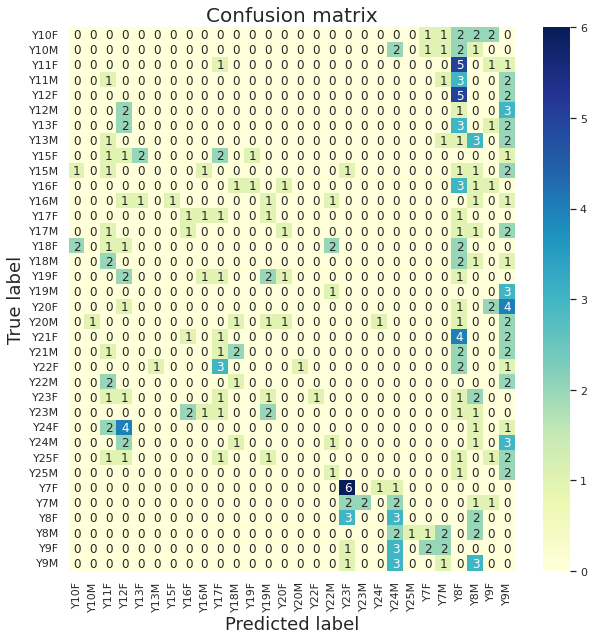

In [28]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)